# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 



# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

# Problem Statement

The goal of this project is to see how different demographic groups react to the offers and to try to predict whether or not a customer who received the offer will complete it.<br><br>
#### Before passing the data to the models:
<ol>
    <li>Data should be preprocessed and prepared.</li>
    <li>Numerical attributes should be normalized.</li>
    <li>Categorical attributes should be encoded.</li>
    <li>Then, passing the data to several supervised learning classification models.</li>
    <li>and finally assessing the models and determining what is the best for this dataset.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<a id='cleaning'></a>
## Data Cleaning: 

### **1- portfolio.json**
Here is the schema and explolation of portfolio.json
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [3]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
list(portfolio['channels'].values)

[['email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile'],
 ['web', 'email', 'mobile'],
 ['web', 'email'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile']]

###### Note:
The channles contains more than one value so it should be disaggregated

In [5]:
portfolio = portfolio.join(pd.DataFrame(MultiLabelBinarizer().fit_transform(
    portfolio.channels), columns=['email', 'mobile', 'social', 'web']))

In [6]:
portfolio

,channels,difficulty,duration,id,offer_type,reward,email,mobile,social,web
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [7]:
portfolio.drop(columns="channels",inplace=True)

The id column looks inconvenient so i would change to somthing more relatable

In [8]:
# creating dictionary for the offer ids for now and later use
i=0
b=1
d=1
inf=1
id_dict={}
for row in portfolio.offer_type:
    if(row[0]=='b'):
        id_dict[portfolio.id[i]]=row[0]+'_'+str(b)
        b=b+1
    elif(row[0]=='i'):
        id_dict[portfolio.id[i]]=row[0]+'_'+str(inf)
        inf=inf+1
    elif(row[0]=='d'):
        id_dict[portfolio.id[i]]=row[0]+'_'+str(d)
        d=d+1
    i=i+1        
id_dict

# reassigning the id values to what in the dictionary
portfolio.id = portfolio.id.map(id_dict)

In [9]:
portfolio

,difficulty,duration,id,offer_type,reward,email,mobile,social,web
0,10,7,b_1,bogo,10,1,1,1,0
1,10,5,b_2,bogo,10,1,1,1,1
2,0,4,i_1,informational,0,1,1,0,1
3,5,7,b_3,bogo,5,1,1,0,1
4,20,10,d_1,discount,5,1,0,0,1
5,7,7,d_2,discount,3,1,1,1,1
6,10,10,d_3,discount,2,1,1,1,1
7,0,3,i_2,informational,0,1,1,1,0
8,5,5,b_4,bogo,5,1,1,1,1
9,10,7,d_4,discount,2,1,1,0,1


In [10]:
portfolio = portfolio.rename(columns={'id': 'offer_id'})

In [11]:
portfolio.to_csv('data/portfolio.csv', index= False)

###### Now portfolio dataframe is clean and ready, lets move to the other dataframes.

### **2- profile.json**
Here is the schema and explolation of profile.json
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [12]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [13]:
profile.id.value_counts().sum()

17000

In [14]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [15]:
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [16]:
profile.id.duplicated().sum()

0

We have 2175 profile with no gender neither income information.

In [17]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


There appears to be odd ages. So, i'll drop the outliers, which is: <br>
Q3 + (1.5 * IQR) = 73 + 1.5 * (73-45) = 115

In [18]:
profile = profile[profile['age'] < 115]
profile.reset_index(drop=True, inplace=True)
profile.describe()

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


There appears to be 2175 outliers droped so we will check the null values again.

In [19]:
profile.isna().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

The 2175 that missed age and income information profiles apeared to be outliers.<br>
Our profile dataset is clean now.

In [20]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [21]:
profile['became_member_on'] = pd.to_datetime(
    profile.became_member_on, format='%Y%m%d', errors='coerce')

profile.head()

,age,became_member_on,gender,id,income
0,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
1,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
2,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0
3,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0
4,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


In [22]:
profile['age_range'] = pd.cut(profile['age'], bins=[
    17, 19, 39, 59, 101], labels=['teenager', 'young_adult', 'middle_aged', 'old_adult'])

In [23]:
profile = profile.rename(columns={'id': 'customer_id'})

In [24]:
profile.to_csv('data/profile.csv', index= False)

###### Now profile dataframe is clean and ready, lets move to the last dataframes.


### **3- transcript.json**
Here is the schema and explolation of transcript.json
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [25]:
transcript.shape

(306534, 4)

In [26]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


Value column contains dectionary with values up to 3 <br>
['offer id', 'offer_id', 'reward', 'amount']

In [27]:
def get_value_dicts(value, col):
    if col in value:
        return value[col]
    elif col.replace('_', ' ') in value:
        return value[col.replace('_', ' ')]

In [28]:
for column in ['offer_id', 'amount', 'reward']:
    transcript[column] = transcript.value.apply(get_value_dicts, col=column)
transcript.drop(columns='value', inplace= True)

In [29]:
transcript.shape

(306534, 6)

In [30]:
transcript.head()

,event,person,time,offer_id,amount,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [31]:
transcript.isna().sum()

event            0
person           0
time             0
offer_id    138953
amount      167581
reward      272955
dtype: int64

In [32]:
# reassigning the offer_id values to what in the dictionary
transcript['offer_id'] = transcript.offer_id.map(id_dict)

In [33]:
transcript[['amount', 'reward']] = transcript[['amount','reward']].fillna(value=0)

In [34]:
transcript.describe()

,time,amount,reward
count,306534.000000,306534.000000,306534.000000
mean,366.382940,5.792023,0.537219
std,200.326314,21.337137,1.805208
min,0.000000,0.000000,0.000000
25%,186.000000,0.000000,0.000000
50%,408.000000,0.000000,0.000000
75%,528.000000,7.100000,0.000000
max,714.000000,1062.280000,10.000000


In [35]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

We have four events and my analysis interests in three of them which is, the viewed and completed offers. Because the offers cant viewd if not been received. Therefore, I will keep the events i want and exclude the rest.

In [36]:
transcript=transcript[transcript['event'].isin(
    ['offer viewed', 'offer completed'])]

In [37]:
transcript = transcript.rename(columns={'person': 'customer_id'})

In [38]:
transcript.to_csv('data/transcript.csv', index=False)

In [39]:
df=pd.read_csv("data/transcript.csv")
df=df.merge(pd.read_csv("data/portfolio.csv"), how='left', on='offer_id')
df=df.merge(pd.read_csv("data/profile.csv"), how = 'left', on = 'customer_id')
df.head()

,event,customer_id,time,offer_id,amount,reward_x,difficulty,duration,offer_type,reward_y,email,mobile,social,web,age,became_member_on,gender,income,age_range
0,offer viewed,389bc3fa690240e798340f5a15918d5c,0,b_4,0.0,0.0,5,5,bogo,5,1,1,1,1,65.0,2018-02-09,M,53000.0,old_adult
1,offer viewed,d1ede868e29245ea91818a903fec04c6,0,i_2,0.0,0.0,0,3,informational,0,1,1,1,0,53.0,2017-09-16,O,52000.0,middle_aged
2,offer viewed,102e9454054946fda62242d2e176fdce,0,b_2,0.0,0.0,10,5,bogo,10,1,1,1,1,69.0,2016-08-14,F,57000.0,old_adult
3,offer viewed,02c083884c7d45b39cc68e1314fec56c,0,b_1,0.0,0.0,10,7,bogo,10,1,1,1,0,20.0,2016-07-11,F,30000.0,young_adult
4,offer viewed,be8a5d1981a2458d90b255ddc7e0d174,0,i_2,0.0,0.0,0,3,informational,0,1,1,1,0,39.0,2014-05-27,M,51000.0,young_adult


In [40]:
df.describe()

,time,amount,reward_x,difficulty,duration,reward_y,email,mobile,social,web,age,income
count,91304.000000,91304.0,91304.000000,91304.000000,91304.000000,91304.000000,91304.0,91304.000000,91304.000000,91304.000000,82304.000000,82304.000000
mean,371.488347,0.0,1.803601,7.969596,6.700156,4.602285,1.0,0.933376,0.705522,0.812812,55.110578,67256.451691
std,198.071423,0.0,2.942222,4.597125,2.075690,3.340985,0.0,0.249370,0.455810,0.390064,17.021547,21357.315304
min,0.000000,0.0,0.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,18.000000,30000.000000
25%,198.000000,0.0,0.000000,5.000000,5.000000,2.000000,1.0,1.000000,0.000000,1.000000,44.000000,52000.000000
50%,414.000000,0.0,0.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,56.000000,66000.000000
75%,534.000000,0.0,3.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,67.000000,82000.000000
max,714.000000,0.0,10.000000,20.000000,10.000000,10.000000,1.0,1.000000,1.000000,1.000000,101.000000,120000.000000


In [41]:
df.columns

Index(['event', 'customer_id', 'time', 'offer_id', 'amount', 'reward_x',
       'difficulty', 'duration', 'offer_type', 'reward_y', 'email', 'mobile',
       'social', 'web', 'age', 'became_member_on', 'gender', 'income',
       'age_range'],
      dtype='object')

## What types of offers publish and how much are they?

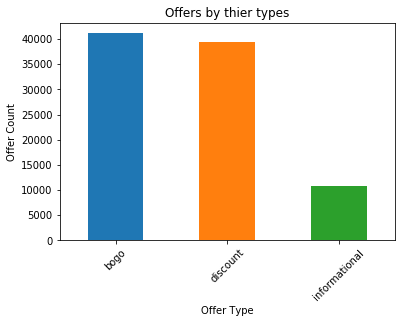

In [42]:
df.groupby(['offer_type']).offer_type.count().plot.bar()
plt.title('Offers by thier types')
plt.xlabel('Offer Type')
plt.xticks(rotation = 45)
plt.ylabel('Offer Count');

Starbucks published a lot of offers but BOGO offers had the biggest share.

### What is the most effective type of offers?

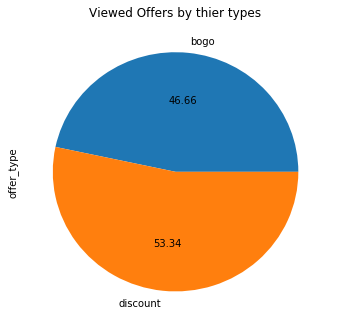

In [43]:
completed=df[df['event']=='offer completed']
completed.groupby(['offer_type']).offer_type.count().plot(
    kind='pie',autopct='%0.2f',figsize=(5.5, 5.5),title='Viewed Offers by thier types');

Even though BOGO offers had the biggest share, the most effective type of offers is discount offers which is the most completed ones.<br>
I think Starbucks should publish more of discount offers.

## What is the most effective channle to share offers offers?

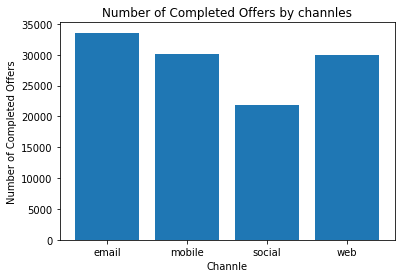

In [44]:
plt.bar(['email', 'mobile', 'social', 'web'],
        [completed.email.sum(),completed.mobile.sum(),completed.social.sum(), completed.web.sum()])
plt.title('Number of Completed Offers by channles')
plt.xlabel('Channle')
plt.ylabel( 'Number of Completed Offers' );

## Who openes the offers and how they interact with it?

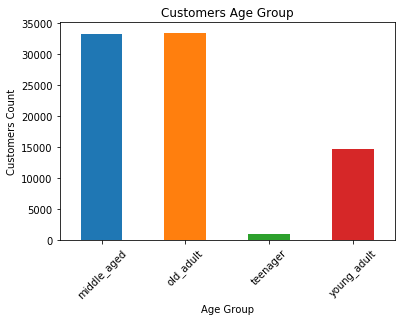

In [45]:
df.groupby(['age_range']).age_range.count().plot.bar()
plt.title('Customers Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation = 45)
plt.ylabel('Customers Count');

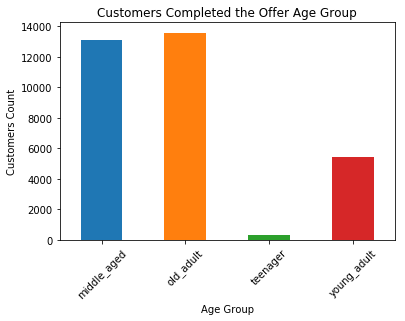

In [46]:
completed.groupby(['age_range']).age_range.count().plot.bar()
plt.title('Customers Completed the Offer Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation = 45)
plt.ylabel('Customers Count');

Starbucks customers are mainly over 20 years old, which is reasonable.<br> What i find odd on these plots is the young adults number which is significantly low.<br> To sustain the business flow and the market share, Starbucks Should target younger customers with precise offers to gain their interest as faithful customers. 

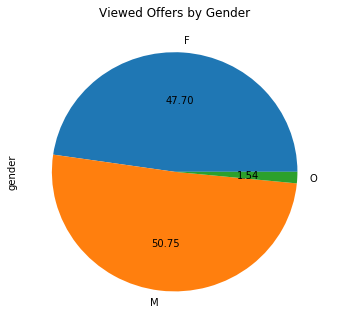

In [47]:
completed.groupby(['gender']).gender.count().plot(
    kind='pie',autopct='%0.2f',figsize=(5.5, 5.5),title='Viewed Offers by Gender');

Most of the people who completes the offers are men. Starbucks may need to serve more spcialized offers or the females.

## What is the average income of the Starbucks customers?

In [48]:
avg_income=profile['income'].mean()
print(f'The average income of Starbucks customers is: {round(avg_income, 2)}$ a year.')

The average income of Starbucks customers is: 65404.99$ a year.


## What is the average age of the Starbucks customers?

In [49]:
avg_age=profile['age'].mean()
print(f'The average age of Starbucks customers is: {int(avg_age)} years.')

The average age of Starbucks customers is: 54 years.


The average age is too high, which could put the company at risk later.

# Sitting the dataset for the modeling phase

In [50]:
df.isna().sum()

event                  0
customer_id            0
time                   0
offer_id               0
amount                 0
reward_x               0
difficulty             0
duration               0
offer_type             0
reward_y               0
email                  0
mobile                 0
social                 0
web                    0
age                 9000
became_member_on    9000
gender              9000
income              9000
age_range           9000
dtype: int64

In [51]:
# Filling null values with appropriate values 
df['income'].fillna(avg_income, inplace=True)
df['age'].fillna(int(avg_age), inplace=True)
df['gender'].fillna(df.gender.value_counts().index[0], inplace=True)

In [52]:
df['age_range'] = pd.cut(df['age'], bins=[
    17, 19, 39, 59, 101], labels=['teenager', 'young_adult', 'middle_aged', 'old_adult'])

In [53]:
df.head(10)

,event,customer_id,time,offer_id,amount,reward_x,difficulty,duration,offer_type,reward_y,email,mobile,social,web,age,became_member_on,gender,income,age_range
0,offer viewed,389bc3fa690240e798340f5a15918d5c,0,b_4,0.0,0.0,5,5,bogo,5,1,1,1,1,65.0,2018-02-09,M,53000.0,old_adult
1,offer viewed,d1ede868e29245ea91818a903fec04c6,0,i_2,0.0,0.0,0,3,informational,0,1,1,1,0,53.0,2017-09-16,O,52000.0,middle_aged
2,offer viewed,102e9454054946fda62242d2e176fdce,0,b_2,0.0,0.0,10,5,bogo,10,1,1,1,1,69.0,2016-08-14,F,57000.0,old_adult
3,offer viewed,02c083884c7d45b39cc68e1314fec56c,0,b_1,0.0,0.0,10,7,bogo,10,1,1,1,0,20.0,2016-07-11,F,30000.0,young_adult
4,offer viewed,be8a5d1981a2458d90b255ddc7e0d174,0,i_2,0.0,0.0,0,3,informational,0,1,1,1,0,39.0,2014-05-27,M,51000.0,young_adult
5,offer viewed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,d_4,0.0,0.0,10,7,discount,2,1,1,0,1,42.0,2016-01-17,M,96000.0,middle_aged
6,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,d_4,0.0,2.0,10,7,discount,2,1,1,0,1,42.0,2016-01-17,M,96000.0,middle_aged
7,offer viewed,8c7df0c393db488aac3e58b06a7ea5f9,0,d_2,0.0,0.0,7,7,discount,3,1,1,1,1,53.0,2016-07-06,F,72000.0,middle_aged
8,offer viewed,e528ceb341964128aaf58a59733ec2af,0,d_2,0.0,0.0,7,7,discount,3,1,1,1,1,46.0,2018-06-29,F,36000.0,middle_aged
9,offer viewed,262ad0fb526a4d53b572007da60cce24,0,b_4,0.0,0.0,5,5,bogo,5,1,1,1,1,40.0,2018-02-27,M,53000.0,middle_aged


## Modeling

In [54]:
# Encoding the categorical attributes
df['gender_cat'] = df['gender'].map({'M': 1, 'F': 2, 'O': 3})
df['offer_type_cat'] = df['offer_type'].map({'bogo': 1, 'discount': 2, 'informational': 3})
df['event_cat'] = df['event'].map({'offer completed': 1, 'offer viewed': 2})

In [55]:
# Defining the X and y for our modeling
X = df[['time', 'amount', 'age', 'gender_cat', 'income','difficulty',
        'duration', 'offer_type_cat', 'email', 'mobile', 'social','web']]

y = df['event_cat']

In [56]:
# scaling some variables before model building and training
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['time', 'age', 'amount', 'difficulty', 'duration','income']
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X_scaled[features])
X = X_scaled
X.head()

,time,amount,age,gender_cat,income,difficulty,duration,offer_type_cat,email,mobile,social,web
0,0.0,0.0,0.566265,1,0.255556,0.25,0.285714,1,1,1,1,1
1,0.0,0.0,0.421687,3,0.244444,0.00,0.000000,3,1,1,1,0
2,0.0,0.0,0.614458,2,0.300000,0.50,0.285714,1,1,1,1,1
3,0.0,0.0,0.024096,2,0.000000,0.50,0.571429,1,1,1,1,0
4,0.0,0.0,0.253012,1,0.233333,0.00,0.000000,3,1,1,1,0


In [57]:
# Sizes of X and y datasets
X.shape, y.shape

((91304, 12), (91304,))

In [58]:
# Preview of X dataset
X.head()

,time,amount,age,gender_cat,income,difficulty,duration,offer_type_cat,email,mobile,social,web
0,0.0,0.0,0.566265,1,0.255556,0.25,0.285714,1,1,1,1,1
1,0.0,0.0,0.421687,3,0.244444,0.00,0.000000,3,1,1,1,0
2,0.0,0.0,0.614458,2,0.300000,0.50,0.285714,1,1,1,1,1
3,0.0,0.0,0.024096,2,0.000000,0.50,0.571429,1,1,1,1,0
4,0.0,0.0,0.253012,1,0.233333,0.00,0.000000,3,1,1,1,0


In [59]:
# Splitting the data set into 70% trining set and 30% testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<a id='dt'></a>
### Building Decision Tree classifier

In [60]:
from sklearn import tree 

# Building the model
dt_clf= tree.DecisionTreeClassifier()

# Training the model
dt_clf.fit(X_train, y_train)

# Generating predictions
dt_preds= dt_clf.predict(X_test)

# Saving Prediction accuracy
dt_clf_score= dt_clf.score(X_test, y_test)*100


print(f'Accuracy of Decision Tree on testing data: {round(dt_clf.score(X_train, y_train)* 100, 4)}%.')
print(f'prediction Accuracy: {round(dt_clf_score, 4)}%')

Accuracy of Decision Tree on testing data: 96.9614%.
prediction Accuracy: 61.8392%


<a id='rf'></a>
### Building Random Forest classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf_clf= RandomForestClassifier()

# Training the model
rf_clf.fit(X_train, y_train)

# Generating predictions
rf_preds= rf_clf.predict(X_test)

# Saving Prediction accuracy
rf_clf_score= rf_clf.score(X_test, y_test)*100


print(f'Accuracy of Random Forest on testing data: {round(rf_clf.score(X_train, y_train)* 100, 4)}%.')
print(f'prediction Accuracy: {round(rf_clf_score, 4)}%')

Accuracy of Random Forest on testing data: 94.9556%.
prediction Accuracy: 57.9111%


<a id='bg'></a>
### Bulding Gradient Boosting classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Building the model
gb_clf= GradientBoostingClassifier()

# Training the model
gb_clf.fit(X_train, y_train)

# Generating predictions
gb_preds= gb_clf.predict(X_test)

# Saving Prediction accuracy
gb_clf_score= gb_clf.score(X_test, y_test)*100


print(f'Accuracy of Gradient Boosting classifier on testing data: {round(gb_clf.score(X_train, y_train)* 100, 4)}%.')
print(f'prediction Accuracy: {round(gb_clf_score, 4)}%')

Accuracy of Gradient Boosting classifier on testing data: 71.3418%.
prediction Accuracy: 71.1193%


<a id='nb'></a>
### Building Naive Bayes classifier

In [63]:
from sklearn.naive_bayes import GaussianNB 

# Building the model
nb_clf= GaussianNB()

# Training the model
nb_clf.fit(X_train, y_train)

# Generating predictions
nb_preds= nb_clf.predict(X_test)

# Saving Prediction accuracy
nb_clf_score= nb_clf.score(X_test, y_test)*100


print(f'Accuracy of Naive Bayes on testing data: {round(nb_clf.score(X_train, y_train)* 100, 4)}%.')
print(f'prediction Accuracy: {round(nb_clf_score, 4)}%')

Accuracy of Naive Bayes on testing data: 64.7515%.
prediction Accuracy: 64.7488%


<a id='knn'></a>
### Bulding K-Nearest Neighbours classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier 

# Building the model
knn_clf= KNeighborsClassifier()

# Training the model
knn_clf.fit(X_train, y_train)

# Generating predictions
knn_preds= knn_clf.predict(X_test)

# Saving Prediction accuracy
knn_clf_score= knn_clf.score(X_test, y_test)*100


print(f'Accuracy of K-Nearest Neighbours on testing data: {round(knn_clf.score(X_train, y_train)* 100, 4)}%.')
print(f'prediction Accuracy: {round(knn_clf_score, 4)}%')

Accuracy of K-Nearest Neighbours on testing data: 75.097%.
prediction Accuracy: 61.9487%


<a id='lr'></a>
### Building Logistic Regression classifier

In [65]:
from sklearn.linear_model import LogisticRegression 

# Building the model
lr_clf= LogisticRegression()

# Training the model
lr_clf.fit(X_train, y_train)

# Generating predictions
lr_preds= lr_clf.predict(X_test)

# Saving Prediction accuracy
lr_clf_score= lr_clf.score(X_test, y_test)*100


print(f'Accuracy of Logistic Regression on testing data: {round(lr_clf.score(X_train, y_train)* 100, 4)}%.')
print(f'prediction Accuracy: {round(lr_clf_score, 4)}%')

Accuracy of Logistic Regression on testing data: 65.0535%.
prediction Accuracy: 64.7525%


<a id='svm'></a>
### Buliding SVM classifier

In [66]:
from sklearn.svm import SVC 

# Building the model
svm_clf= SVC()

# Training the model
svm_clf.fit(X_train, y_train)

# Generating predictions
svm_preds= svm_clf.predict(X_test)

# Saving Prediction accuracy
svm_clf_score= svm_clf.score(X_test, y_test)*100


print(f'Accuracy of SVM on testing data: {round(svm_clf.score(X_train, y_train)* 100, 4)}%.')
print(f'prediction Accuracy: {round(svm_clf_score, 4)}%')

Accuracy of SVM on testing data: 65.5949%.
prediction Accuracy: 65.1541%


In [67]:
print(f'The Gradient Boosting classifier with prediction accuracy: {round(gb_clf_score, 4)}%')

The Gradient Boosting classifier with prediction accuracy: 71.1193%


### Tunning the Gradient Boosting classifier using RandomizedSearch

In [68]:
from sklearn.model_selection import RandomizedSearchCV
param= {
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_depth': np.linspace(1, 32, 32, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'max_features': list(range(1,X.shape[1]))
}
tunned_gb_clf = RandomizedSearchCV(gb_clf, param, cv=5, n_iter=15, return_train_score=False)
tunned_gb_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.]), 'min_samples_split': array([ 0.1,  0.2,  0.

In [69]:
print('Best parameters for the Gradient Boosting classifier are: ',tunned_gb_clf.best_params_)
print('And it scored: ',tunned_gb_clf.best_score_)

Best parameters for the Gradient Boosting classifier are:  {'n_estimators': 200, 'min_samples_split': 0.30000000000000004, 'max_features': 2, 'max_depth': 7.0, 'learning_rate': 0.1}
And it scored:  0.699086243585


# Conclusion 
In this project, I attempted to analyze and predict how a customer would react to a Starbucks offer. The Gradient Boosting model did an impressive work predicting the events.<br>
I believe their is several ways to improve the models by tuning them.<br>
I did my best here. In the near future I'll focus on learning how to improve the ML model.
